In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('BIKE DETAILS.csv')

In [3]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [4]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [5]:
df = df.drop('ex_showroom_price', axis = 1)

In [6]:
df.isnull().sum()

name             0
selling_price    0
year             0
seller_type      0
owner            0
km_driven        0
dtype: int64

## Dealing with the outliers

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

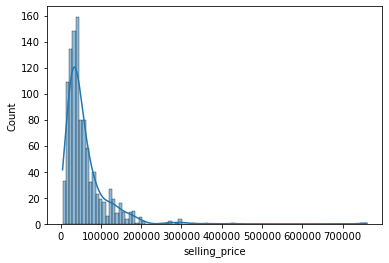

In [7]:
sns.histplot(df['selling_price'], kde = True)

As seen above, we do have outliers in terms of selling price and I will be removing the outliers with the help of quantile method.

In [8]:
q = df['selling_price'].quantile(0.975)
df_2 = df[df['selling_price'] < q]
df_2.describe(include = 'all')

,name,selling_price,year,seller_type,owner,km_driven
count,1030,1030.000000,1030.000000,1030,1030,1030.000000
unique,265,NaN,NaN,2,4,NaN
top,Bajaj Pulsar 150,NaN,NaN,Individual,1st owner,NaN
freq,41,NaN,NaN,1024,900,NaN
mean,NaN,53346.678641,2013.761165,NaN,NaN,35181.764078
std,NaN,36037.408053,4.295821,NaN,NaN,52159.074675
min,NaN,5000.000000,1988.000000,NaN,NaN,350.000000
25%,NaN,27000.000000,2011.000000,NaN,NaN,14500.000000
50%,NaN,42000.000000,2015.000000,NaN,NaN,25000.000000
75%,NaN,68750.000000,2017.000000,NaN,NaN,44000.000000


<AxesSubplot:xlabel='selling_price', ylabel='Count'>

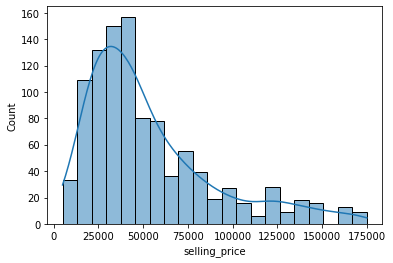

In [9]:
sns.histplot(df_2['selling_price'], kde = True)

Now we have fairly more normally distributed graph in terms of 'selling_price', since we removed the outliers.

Let's continue to look for more outliers in other features.

<AxesSubplot:xlabel='km_driven', ylabel='Count'>

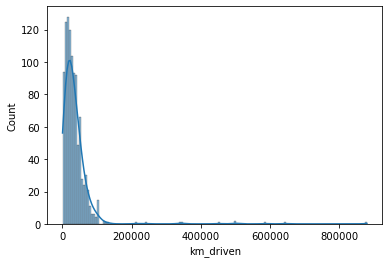

In [10]:
sns.histplot(df_2['km_driven'],kde = True)

In [12]:
df_3 = df_2[df_2['km_driven'] < 100000]

<AxesSubplot:xlabel='km_driven', ylabel='Count'>

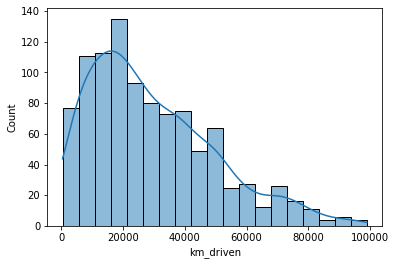

In [13]:
sns.histplot(df_3['km_driven'], kde = True)

In [14]:
r = df_3['year'].quantile(0.01)
df_4 = df_3[df_3['year'] > r]

In [16]:
df = df_4

In [18]:
df.describe(include= 'all')

,name,selling_price,year,seller_type,owner,km_driven
count,986,986.000000,986.000000,986,986,986.000000
unique,255,NaN,NaN,2,3,NaN
top,Bajaj Pulsar 150,NaN,NaN,Individual,1st owner,NaN
freq,40,NaN,NaN,982,869,NaN
mean,NaN,54242.383367,2014.130832,NaN,NaN,29451.018256
std,NaN,35887.881558,3.704863,NaN,NaN,20398.384830
min,NaN,6000.000000,2001.000000,NaN,NaN,350.000000
25%,NaN,29925.000000,2012.000000,NaN,NaN,14000.000000
50%,NaN,45000.000000,2015.000000,NaN,NaN,25000.000000
75%,NaN,70000.000000,2017.000000,NaN,NaN,40000.000000


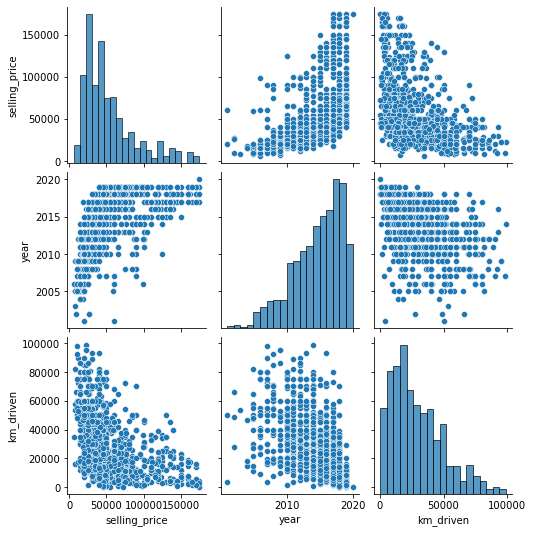

In [20]:
sns.pairplot(df)

## Dummy Variables

In [26]:
df_object = df.select_dtypes(include = 'object')
df_numeric = df.select_dtypes (exclude = 'object')

In [27]:
df_object_dummies = pd.get_dummies(df_object, drop_first=True)

In [28]:
df_object_dummies

,name_Activa 4g,name_Aprilia SR 125,name_Bajaj ct 100,name_Bajaj Avenger 150,name_Bajaj Avenger 150 street,name_Bajaj Avenger 220,name_Bajaj Avenger 220 dtsi,name_Bajaj Avenger Cruise 220,name_Bajaj Avenger Street 150 [2018],name_Bajaj Avenger Street 160,...,name_Yamaha Saluto,name_Yamaha Saluto RX,name_Yamaha YBR 125,name_Yamaha YZF R15 S,name_Yamaha YZF R15 V3,name_Yamaha YZF R15 [2011-2018],name_Yo Style,seller_type_Individual,owner_2nd owner,owner_3rd owner
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
final_df = pd.concat([df_numeric, df_object_dummies], axis = 1)

In [31]:
final_df.describe(include = 'all')

,selling_price,year,km_driven,name_Activa 4g,name_Aprilia SR 125,name_Bajaj ct 100,name_Bajaj Avenger 150,name_Bajaj Avenger 150 street,name_Bajaj Avenger 220,name_Bajaj Avenger 220 dtsi,...,name_Yamaha Saluto,name_Yamaha Saluto RX,name_Yamaha YBR 125,name_Yamaha YZF R15 S,name_Yamaha YZF R15 V3,name_Yamaha YZF R15 [2011-2018],name_Yo Style,seller_type_Individual,owner_2nd owner,owner_3rd owner
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,...,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,54242.383367,2014.130832,29451.018256,0.001014,0.002028,0.001014,0.001014,0.001014,0.003043,0.002028,...,0.003043,0.001014,0.002028,0.006085,0.002028,0.006085,0.001014,0.995943,0.110548,0.008114
std,35887.881558,3.704863,20398.384830,0.031846,0.045015,0.031846,0.031846,0.031846,0.055104,0.045015,...,0.055104,0.031846,0.045015,0.077809,0.045015,0.077809,0.031846,0.063596,0.313730,0.089755
min,6000.000000,2001.000000,350.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29925.000000,2012.000000,14000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,45000.000000,2015.000000,25000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,70000.000000,2017.000000,40000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,175000.000000,2020.000000,99000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
final_df.corr()['selling_price'].sort_values()

km_driven                             -0.456714
name_Hero Honda Splendor Plus         -0.120823
name_Honda Activa [2000-2015]         -0.116000
owner_2nd owner                       -0.112209
name_Bajaj Discover 125               -0.096871
                                         ...   
name_Royal Enfield Thunderbird 350     0.189076
name_Royal Enfield Thunderbird 350X    0.235840
name_Royal Enfield Classic 350         0.349870
year                                   0.556753
selling_price                          1.000000
Name: selling_price, Length: 260, dtype: float64

## Splitting the Dataset

In [33]:
df = final_df

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 1060
Columns: 260 entries, selling_price to owner_3rd owner
dtypes: int64(3), uint8(257)
memory usage: 278.3 KB


In [35]:
X = df.drop('selling_price', axis = 1)

In [36]:
X

,year,km_driven,name_Activa 4g,name_Aprilia SR 125,name_Bajaj ct 100,name_Bajaj Avenger 150,name_Bajaj Avenger 150 street,name_Bajaj Avenger 220,name_Bajaj Avenger 220 dtsi,name_Bajaj Avenger Cruise 220,...,name_Yamaha Saluto,name_Yamaha Saluto RX,name_Yamaha YBR 125,name_Yamaha YZF R15 S,name_Yamaha YZF R15 V3,name_Yamaha YZF R15 [2011-2018],name_Yo Style,seller_type_Individual,owner_2nd owner,owner_3rd owner
0,2019,350,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2017,5650,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2018,12000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2015,23000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2011,21000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,2017,35000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1057,2012,33000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1058,2013,35000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1059,2009,53000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
y = df['selling_price']

In [24]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

## Scaling

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
scaled_X_train = scaler.fit_transform(X_train)

In [44]:
scaled_X_test = scaler.transform(X_test)

## Elastic Net Model

In [45]:
from sklearn.linear_model import ElasticNet

In [46]:
base_elastic_model = ElasticNet()

In [47]:
param_grid = {'alpha':[0.1,1,5,10,100], 'l1_ratio': [.1,.7,.99,1]}

## Grid Search

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
grid_model = GridSearchCV(base_elastic_model,
                          param_grid = param_grid,
                          scoring = 'neg_mean_squared_error',
                          cv = 5, verbose = 1)

In [50]:
grid_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\pc1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10048496470.329548, tolerance: 91114197.54795769
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7824960319.994774, tolerance: 93242815.43269958
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7931666367.254204, tolerance: 90023149.53539789
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc1\anaconda3\lib\site-p

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 100],
                         'l1_ratio': [0.1, 0.7, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [51]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.7}

## Evaluate the Model Performance

In [63]:
y_pred = grid_model.predict(scaled_X_test)

In [64]:
y_pred

array([ 38928.76929057,  72804.15745329,  16125.32671441,  17850.62593306,
        49795.93315487, 150659.58112188,  51925.4157718 ,  48285.92921073,
        57464.35252025,  55205.02447844,  33065.13378461,  67820.23111065,
        42627.03891028,  29822.56063712, 132069.02844517,  44850.25487456,
       109408.46961606,  58894.23356579,  75231.06302913,  34962.42974702,
        44018.16982732,  68506.50390415,  52766.03300708,  40409.50754863,
        46120.01230022,  42391.60649636,  51163.33919037, 135618.54459094,
       104628.09366207,  15401.44275937,  54738.63334523,  52113.46800606,
       102660.69391716,  73614.31746264,  65029.03090812,  53686.82532051,
        69257.22544152,  41442.47524366,  33313.23041048,  35685.00204152,
        52227.696436  ,  37160.56129739,  72110.98577216,  54893.07736295,
        36696.00093607,  54799.73837964,  57057.3367757 ,  12998.82383945,
         6013.00800414, 112278.04428336,  68400.53430851,  49237.45709968,
        29794.77883639,  

In [53]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [54]:
mean_absolute_error(y_test,y_pred)

12892.067365347699

In [56]:
np.sqrt(mean_squared_error(y_test,y_pred))

19893.117769057782

## Evaluation

Does our model have a good prediction, namely is the value 19893.117769057782 a good performance?

Let's check this by comparing it with the mean 'selling_price'.

In [57]:
np.mean(df['selling_price'])

54242.38336713996

In [60]:
12892.067365347699 / 54242.38336713996

0.23767516405183836

Actually if we consider the fact that the mean absolute error is around 23 %, it is fair to say that our model is not predicting the values so well. In this situation it would be better to go back and check the parameters in the model creaton section